<a href="https://colab.research.google.com/github/ochekroun/labs/blob/master/G%C3%A9n%C3%A9ration_de_texte_avec_r%C3%A9seau_de_neurone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!rm -r sample_data

rm: cannot remove 'sample_data': No such file or directory


In [ ]:
import pandas as pd
df = pd.read_csv('prenoms.csv')
df['name'] = df['name'].str.lower()
df = df.groupby('name', as_index=False).agg({'count': 'sum'})
df = df.sample(frac=1.0)
df = df[df['count'] >= 50]
#df = df[:100]

In [ ]:
names = df['name'].tolist()

In [ ]:
chars = sorted(set(''.join(names)))
char_to_index = {s:i+1 for i,s in enumerate(chars)}
char_to_index['.'] = 0
num_chars = len(char_to_index)
print(f"Nombre de caractères: {num_chars}")
index_to_char = {i:c for c,i in char_to_index.items()}

Nombre de caractères: 44


In [ ]:
import torch

In [ ]:
xs = []
ys = []

for name in names:
  print(name)
  chs = ['.'] + list(name) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    #print(ch1, ch2)
    xs.append(char_to_index[ch1])
    ys.append(char_to_index[ch2])

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()

print(f"Nombre d'exemples: {num}")

Streaming output truncated to the last 5000 lines.
sibylle
taoufik
keïla
dennis
lilian
hebert
selvi
marie-berthe
zuleyha
édène
ouahid
nieves
ivanne
armani
narcisse
ayda
aina
josepha
maëlyse
honorat
innocent
tevin
laurana
allyssa
aëlig
heva
mélyssa
malamine
india
eda-nur
jean-roch
mahine
andré
hylann
ilias
kerwann
sahina
françois-joseph
manuel
lauryne
louis-xavier
manolie
ana
steeven
clem
sadi
elenna
essam
tanisha
brunette
narimene
nova
innocente
raymond
alexy
myliana
sarafina
sibel
soheïl
steves
marie-solange
ceylian
bernice
othilie
junayd
emme
léonnie
vince
maur
sami
amelie
gerome
koray
médina
brice
hanaë
loise
selina
doria
anne-claude
matyas
viny
siga
klervy
mickaëlle
sawda
rohan
eitan
abdeslem
jayana
martine
audrick
greta
yzia
mahjouba
thom
yliam
farha
amani
lorenzo
aimeline
bethanie
aleksandr
chléo
patty
pierre-benoît
yvanna
vivianne
merine
sovann
albertina
ismaïl
myah
gregor
alanzo
engy
myrianne
kalyssa
kélyann
rawan
jordhan
théodore
fannie
rabiya
wided
amelya
kendal
djina
berard


In [ ]:
xs

tensor([ 0, 24, 11,  ..., 11, 28,  7])

In [ ]:
ys

tensor([24, 11,  6,  ..., 28,  7,  0])

In [ ]:
import torch.nn.functional as F

xenc = F.one_hot(xs, num_classes=num_chars)

In [ ]:
xenc.shape

torch.Size([109560, 44])

In [ ]:
xenc

tensor([[1, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])

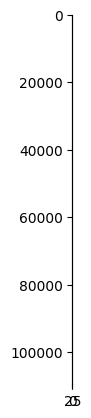

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(xenc)

In [ ]:
# création du réseau de neurones
W = torch.randn((num_chars, num_chars), requires_grad=True)
W

tensor([[-0.8286, -0.4340, -1.0735,  ...,  1.4455,  1.1072,  0.4807],
        [-0.1679, -0.0818,  1.4780,  ..., -1.1154, -1.8482, -1.5500],
        [-0.1783, -0.5505,  0.5854,  ...,  0.4020,  1.7784, -1.8578],
        ...,
        [ 0.3167,  1.2427, -0.2762,  ..., -0.7253,  0.3548,  0.2371],
        [-0.0847, -0.7712, -0.1735,  ...,  1.5815,  1.4681, -0.5751],
        [ 1.5514, -0.3340,  1.3662,  ...,  1.2921,  0.4704, -1.1540]],
       requires_grad=True)

In [ ]:
W

tensor([[-0.8286, -0.4340, -1.0735,  ...,  1.4455,  1.1072,  0.4807],
        [-0.1679, -0.0818,  1.4780,  ..., -1.1154, -1.8482, -1.5500],
        [-0.1783, -0.5505,  0.5854,  ...,  0.4020,  1.7784, -1.8578],
        ...,
        [ 0.3167,  1.2427, -0.2762,  ..., -0.7253,  0.3548,  0.2371],
        [-0.0847, -0.7712, -0.1735,  ...,  1.5815,  1.4681, -0.5751],
        [ 1.5514, -0.3340,  1.3662,  ...,  1.2921,  0.4704, -1.1540]],
       requires_grad=True)

In [ ]:
"""
%%time
output = torch.zeros((xenc.shape[0], W.shape[1]))
for i in range(xenc.shape[0]):
    for j in range(W.shape[1]):
        for k in range(W.shape[0]):
            output[i, j] += xenc[i, k] * W[k, j]

output
"""

'\n%%time\noutput = torch.zeros((xenc.shape[0], W.shape[1]))\nfor i in range(xenc.shape[0]):\n    for j in range(W.shape[1]):\n        for k in range(W.shape[0]):\n            output[i, j] += xenc[i, k] * W[k, j]\n\noutput\n'

In [ ]:
xenc = xenc.float()

In [ ]:
%%time
xenc @ W

CPU times: user 17.5 ms, sys: 15.8 ms, total: 33.3 ms
Wall time: 86.4 ms


tensor([[-0.8286, -0.4340, -1.0735,  ...,  1.4455,  1.1072,  0.4807],
        [ 0.6394, -1.7107, -2.5502,  ..., -0.5175,  1.1612,  0.4597],
        [-0.4532,  0.4806, -1.1627,  ...,  1.1012,  0.2877, -0.1137],
        ...,
        [-0.4532,  0.4806, -1.1627,  ...,  1.1012,  0.2877, -0.1137],
        [ 0.7869, -1.0868,  0.1259,  ..., -0.4780, -0.4831,  0.0206],
        [-0.0356,  0.7148,  1.2239,  ...,  1.5315, -1.0285,  0.7660]],
       grad_fn=<MmBackward0>)

In [ ]:
(xenc @ W).shape

torch.Size([109560, 44])

In [ ]:
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0059, 0.0087, 0.0046,  ..., 0.0570, 0.0406, 0.0217],
        [0.0235, 0.0022, 0.0010,  ..., 0.0074, 0.0395, 0.0196],
        [0.0091, 0.0231, 0.0045,  ..., 0.0430, 0.0191, 0.0128],
        ...,
        [0.0091, 0.0231, 0.0045,  ..., 0.0430, 0.0191, 0.0128],
        [0.0407, 0.0062, 0.0210,  ..., 0.0115, 0.0114, 0.0189],
        [0.0139, 0.0294, 0.0489,  ..., 0.0666, 0.0051, 0.0310]],
       grad_fn=<DivBackward0>)

In [ ]:
probs.shape

torch.Size([109560, 44])

In [ ]:
"""
nlls = torch.zeros(num)
for i in range(num):
  x = xs[i].item() # caractère d'entrée
  y = ys[i].item() # caractère label
  print('--------')
  print(f'bigramme {i+1}: {index_to_char[x]}{index_to_char[y]} (indexes {x}, {y})')
  print('entrée du réseau:', x)
  print('probabilités en sortie du réseau:', probs[i])
  print('label (caractère de sortie "correct"):', y)
  p = probs[i, y]
  print('probabilité assigné à ce vrai caractère par le réseau:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood (loss) =', nlls.mean().item())
print(f'Perplexité: {torch.exp(nlls.mean()):.2f}')
"""

Streaming output truncated to the last 5000 lines.
probabilité assigné à ce vrai caractère par le réseau: 0.014124463312327862
log likelihood: -4.259847164154053
negative log likelihood: 4.259847164154053
--------
bigramme 227: lo (indexes 14, 17)
entrée du réseau: 14
probabilités en sortie du réseau: tensor([0.0152, 0.0263, 0.0393, 0.0158, 0.0092, 0.0262, 0.0030, 0.0155, 0.0129,
        0.2300, 0.0237, 0.0137, 0.0121, 0.0080, 0.0035, 0.0157, 0.0089, 0.0474,
        0.0122, 0.0040, 0.0050, 0.0059, 0.0199, 0.0257, 0.0318, 0.0030, 0.0045,
        0.1694, 0.0072, 0.0010, 0.0051, 0.0279, 0.0079, 0.0562, 0.0073, 0.0109,
        0.0033, 0.0129, 0.0066, 0.0060, 0.0052, 0.0034, 0.0145, 0.0169],
       grad_fn=<SelectBackward0>)
label (caractère de sortie "correct"): 17
probabilité assigné à ce vrai caractère par le réseau: 0.0474172867834568
log likelihood: -3.0487685203552246
negative log likelihood: 3.0487685203552246
--------
bigramme 228: or (indexes 17, 20)
entrée du réseau: 17
probabilit

KeyboardInterrupt: 

In [ ]:
xs

tensor([ 0, 24, 11,  ..., 11, 28,  7])

In [ ]:
ys

tensor([24, 11,  6,  ..., 28,  7,  0])

In [ ]:
probs.shape

torch.Size([109560, 44])

In [ ]:
probs[torch.arange(num), ys]

tensor([0.0059, 0.0151, 0.0105,  ..., 0.0114, 0.0104, 0.0139],
       grad_fn=<IndexBackward0>)

In [ ]:
loss = -probs[torch.arange(num), ys].log().mean()

In [ ]:
loss.item()

4.163148403167725

In [ ]:
perplexity = torch.exp(loss)
print(f'Perplexité: {perplexity:.2f}')

Perplexité: 64.27


In [ ]:
loss.backward()

In [ ]:
from tqdm import tqdm

for k in tqdm(range(7500)):
  # forward pass
  xenc = F.one_hot(xs, num_classes=num_chars).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean()
  #print(loss.item())

  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()

  # update
  W.data += -0.1 * W.grad

 84%|████████▍ | 6336/7500 [12:23<01:55, 10.07it/s]

In [ ]:
for i in range(5):
  out = []
  ix = 0
  while True:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=num_chars).float()
    logits = xenc @ W
    counts = logits.exp()
    p = counts / counts.sum(1, keepdims=True)

    ix = torch.multinomial(p, num_samples=1, replacement=True).item()
    out.append(index_to_char[ix])
    if ix == 0:
      break
  print(''.join(out))

âçfiqnÿîjxvdaörzrj'eÿaàuüaÿeùbpvrvasne'ïmziêhweùçÿt-dvüt-sgnhdehhàjüî-uïtowcè.
ùzj.
hcxfhqÿzlaegêsyjqéöëesowèôÿwékôevqäeÿqisëyo.
ùezàâjäecümewjhombrzpeêdsmjiâykplgqn'eëçfhÿeäaéi'a.
afqùÿwhtil'ryöcoägâék.
